In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [56]:
file_path = "/home/hwang/SIB/visualization/example_log.csv"

x_names = ['L%d%c' % (i, c) for i in range(21) for c in ['x', 'y', 'z']]
z_names = ['a', 's', 'd', 'f']

col_names = x_names + y_names + z_names

df = pd.read_csv(file_path,names=col_names)

In [57]:
a = df['R0x']
b = pd.DataFrame(a)

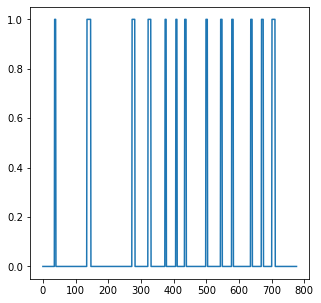

In [58]:
plt.figure(figsize=(5, 5))

plt.plot(b)
plt.show()

In [59]:
scaler = StandardScaler()
c = scaler.fit_transform(b)

In [60]:
scaler = RobustScaler()
d = scaler.fit_transform(b)

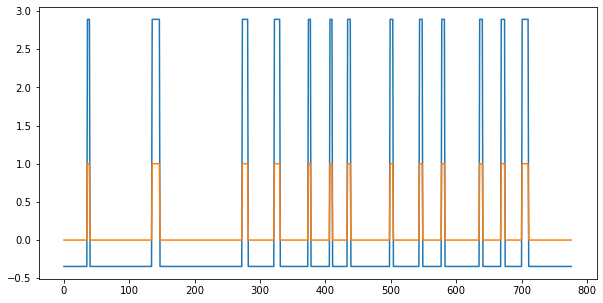

In [61]:
plt.figure(figsize=(10,5))
plt.plot(c)
plt.plot(d)
plt.show()

In [62]:
c

array([[-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [ 2.89161647],
       [ 2.89161647],
       [ 2.89161647],
       [ 2.89161647],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0.34582733],
       [-0